In [ ]:
# !pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.0 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


In [1]:
from tools_jw import *
import pandas as pd
import glob

In [2]:
color_sampled=plt.cm.tab10.colors[:4]
plt.rcParams['axes.prop_cycle'] = cycler(color=color_sampled, marker=valid_markers[:4])
plt.rcParams["font.family"] = "serif"      # e.g., serif, sans-serif, monospace
plt.rcParams["font.size"] = 18

In [9]:
def func1(inp_dir, inpls):
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    
    for csvpath in inpls:
        print(csvpath)
        if "gt_nsgdm" in csvpath:
            label="GT_NSGDm"
        elif "muon" in csvpath:
            label="DeMUON"
        elif "dsgd_gclip_decay" in csvpath:
            label="DSGD_Clip"
        elif "dsgd" in csvpath:
            label="DSGD"
        else:
            label="unknown"
        df=pd.read_csv(csvpath)
        df['val_avg']=df[[f'w{i}_val' for i in range(8)]].mean(axis=1)
        df['train_avg']=df[[f'w{i}_train' for i in range(8)]].mean(axis=1)
        ax1.plot(df['round'], df['train_avg'], markevery=10, label=label)
        ax2.plot(df['round'], df['val_avg'], markevery=10, label=label)

    for ele in [ax1, ax2]:
        ele.legend(fontsize=12, loc='upper right')
        ele.set_xlabel('Round')
        ele.grid(True)
        # ele.set_title(title)
        

    ax1.set_ylabel('Train loss')
    ax2.set_ylabel('Validation loss')
    fig1.savefig(f'{inp_dir}/train.pdf',bbox_inches="tight",)
    fig2.savefig(f'{inp_dir}/val.pdf',bbox_inches="tight",)


output/ring/ring_dsgd_lr0.01_epoch12_seed42_worker_losses.csv
output/ring/ring_dsgd_gclip_decay_lr10_l2_clip_bd0.1_epoch12_seed42_worker_losses.csv
output/ring/ring_gt_nsgdm_lr0.1_mom0.8_epoch12_seed42_worker_losses.csv
output/ring/ring_muon_lr0.1_mom0.8_epoch12_seed42_worker_losses.csv
output/exp/exp_dsgd_lr0.01_epoch12_seed42_worker_losses.csv
output/exp/exp_dsgd_gclip_decay_lr10_l2_clip_bd0.1_epoch12_seed42_worker_losses.csv
output/exp/exp_gt_nsgdm_lr0.1_mom0.8_epoch12_seed42_worker_losses.csv
output/exp/exp_muon_lr0.1_mom0.8_epoch12_seed42_worker_losses.csv
output/complete/complete_dsgd_lr0.01_epoch12_seed42_worker_losses.csv
output/complete/complete_dsgd_gclip_decay_lr10_l2_clip_bd0.1_epoch12_seed42_worker_losses.csv
output/complete/complete_gt_nsgdm_lr0.1_mom0.8_epoch12_seed42_worker_losses.csv
output/complete/complete_muon_lr0.1_mom0.8_epoch12_seed42_worker_losses.csv


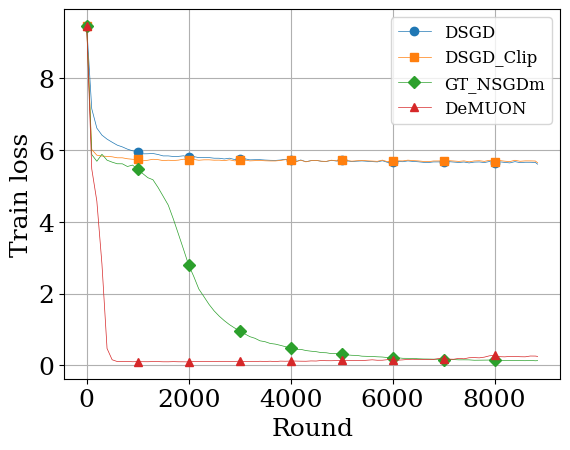

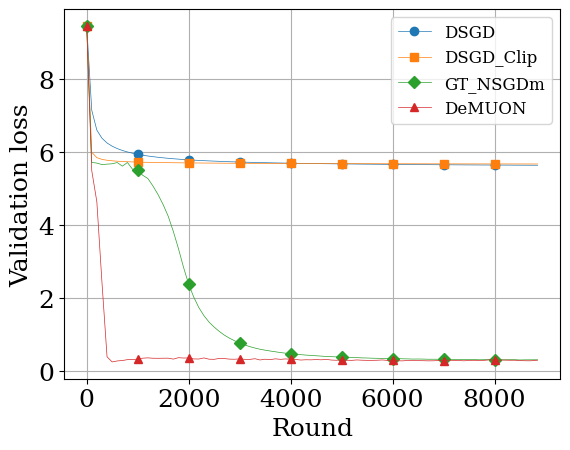

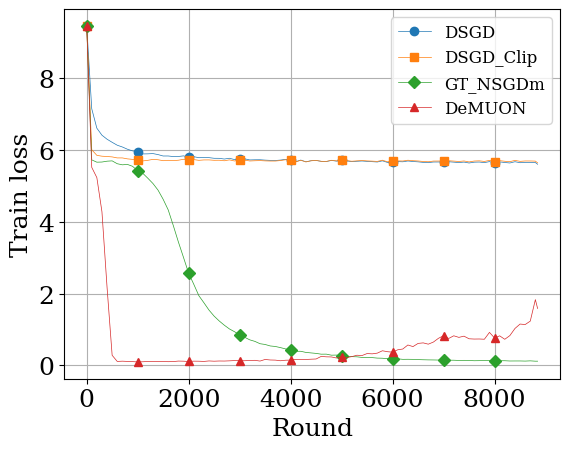

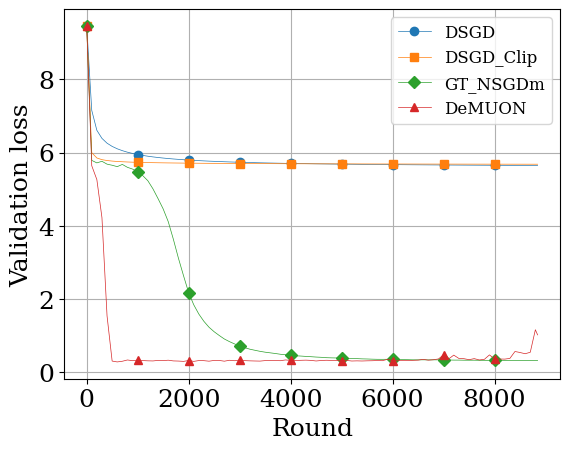

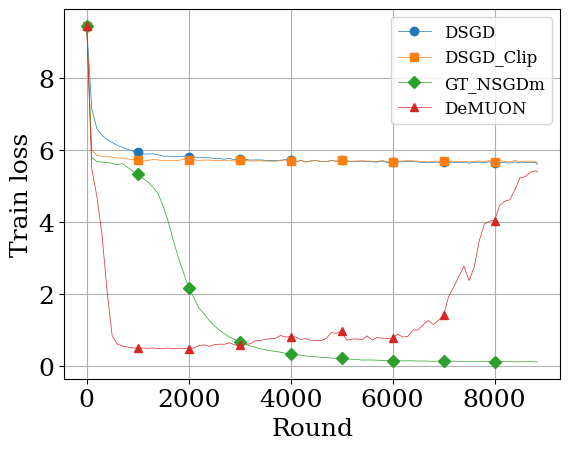

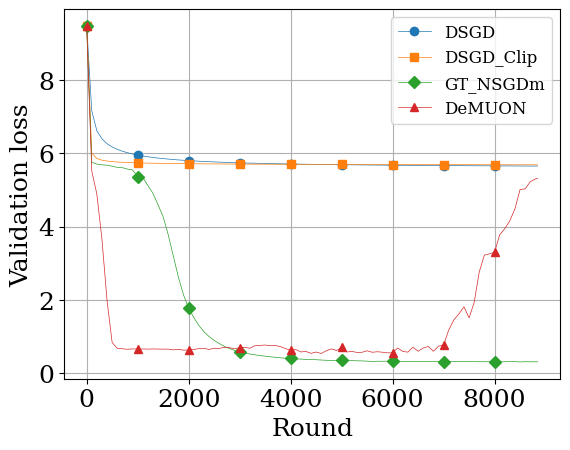

In [11]:
for inpdir in [f'output/{_}' for _ in ['ring','exp','complete']]:
    newls=[0,0,0,0]
    for csvpath in glob.glob(f'{inpdir}/*.csv'):
        if "gt_nsgdm" in csvpath:
            newls[-2]=csvpath
        elif "muon" in csvpath:
            newls[-1]=csvpath
        elif "dsgd_gclip_decay" in csvpath:
            newls[1]=csvpath
        elif "dsgd" in csvpath:
            newls[0]=csvpath
        else:
            label="unknown"

    func1(inpdir, newls)